In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Now importing the dataset

In [5]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dft = pd.read_csv(url)
dft.head()
#Thus the dataset is represented here
#Under the required coulmn headings
#Here we use the url link with csv as the extention

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Splitting the dataset into test and train sections

In [6]:
training_set = dft.iloc[:, 1:2].values

# Minmax scalar for scaling the dataset

In [7]:
#Here we scale the dataset using only 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
We want our data to be in the form of a 3D array for our LSTM model. First, we create data in 60 timesteps and 
convert it into an array using NumPy. 
Then, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.We train the 
model using 

In [8]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 
#Using keras library dataset we can use LSTM (Long short term memory network)


In [11]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

#We compile the model using the adam optimizer and set the loss as the mean_squarred_error
model.fit(X_train,y_train,epochs=100,batch_size=32)
#Thus we have succesfully trained the model using adam optimizer and LSTM

Epoch 1/100
62/62 [==============================] - 24s 158ms/step - loss: 0.0109
Epoch 2/100
62/62 [==============================] - 10s 166ms/step - loss: 0.0034
Epoch 3/100
62/62 [==============================] - 10s 161ms/step - loss: 0.0027
Epoch 4/100
62/62 [==============================] - 10s 154ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 10s 168ms/step - loss: 0.0026
Epoch 6/100
62/62 [==============================] - 10s 166ms/step - loss: 0.0026
Epoch 7/100
62/62 [==============================] - 10s 167ms/step - loss: 0.0022
Epoch 8/100
62/62 [==============================] - 10s 169ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 10s 164ms/step - loss: 0.0022
Epoch 10/100
62/62 [==============================] - 11s 171ms/step - loss: 0.0021
Epoch 11/100
62/62 [==============================] - 10s 163ms/step - loss: 0.0019
Epoch 12/100
62/62 [==============================] - 10s 164ms/step - loss: 0.0020
E

# Importing the testing dataset

In [13]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
Before predicting future stock prices, we have to manipulate the training set; 
we merge the training set and the test set on the 0 axis, set the time step to 60, 
use minmaxscaler, and reshape the dataset as done previously. 


In [15]:
dataset_total = pd.concat((dft['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 10s 10s/step


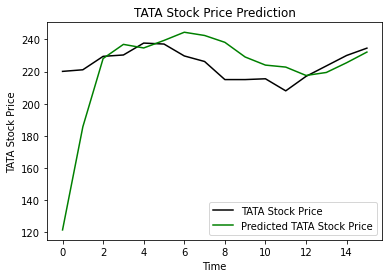

In [16]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
#Here using pyplot library we can plot the the graph for Actual stock price and the predicted stock price 

In [ ]:
here we can observe that the prediction line is not seen to be accurate initially before two months.
Later the prediction line is inline with the actual stock price.Thus using the ML model we predicted the future stock prices
based on data of  2036 days.